<a href="https://colab.research.google.com/github/BAHAMLAOUHI/Data-Mining-Project/blob/main/EDA_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('onlinefraud.csv')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


In [9]:
# df_copy=df.copy()

In [10]:
# df=df_copy.drop('isFraud',axis=1)

# Préparation des données


1.   Nettoyage des données
2.   Visualisation et Comprendre les relations entre les caractéristique
3.   Sélection des caractéristiques
4.   Transformation de données
5.   Réduction de dimensionnalité




1.   Nettoyage des données


* les valeurs manquantes
* eliminer les duplications
* Type de données incorrect ou déroutant
* caractéristiques Redondantes: représentent les mêmes informations
* caractéristique Inutile pour l'exploration de données
* caractéristique Contient trop de valeurs manquantes
* imputation des données si necessaire





In [11]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [12]:
# rows_with_null = df[df.isnull().any(axis=1)]

# print(rows_with_null)


In [13]:
# len(rows_with_null)

In [14]:
df.shape[0]

6362620

In [15]:
# df.drop(rows_with_null.index, inplace=True)
# df.isna().sum()

In [16]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
df.duplicated().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [28]:
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [29]:
df["type"].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [30]:
df["nameOrig"].value_counts()

,count
nameOrig,
C1902386530,3
C363736674,3
C545315117,3
C724452879,3
C1784010646,3
...,...
C98968405,1
C720209255,1
C1567523029,1


In [31]:
df["nameDest"].value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M1470027725,1
M1330329251,1
M1784358659,1


In [6]:
df.drop(['nameDest', 'nameOrig'],axis=1,inplace=True)

In [33]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [34]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [35]:
df[df["isFlaggedFraud"] == 1]


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,4953893.08,4953893.08,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,1343002.08,1343002.08,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,536624.41,536624.41,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,4892193.09,4892193.09,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,19585040.37,19585040.37,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,19585040.37,19585040.37,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,3576297.10,3576297.10,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,353874.22,353874.22,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,2542664.27,2542664.27,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,10399045.08,10399045.08,0.0,0.0,1,1


In [7]:
df.drop(df[df["isFlaggedFraud"] == 1].index, inplace=True)

In [8]:
df.drop('isFlaggedFraud',axis=1,inplace=True)

In [38]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06
mean,2.433965e+02,1.798501e+05,8.338655e+05,8.550962e+05,1.100704e+06,1.224999e+06,1.288309e-03
std,1.423311e+02,6.037884e+05,2.888205e+06,2.924012e+06,3.399184e+06,3.674133e+06,3.586990e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338955e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487127e+04,1.420800e+04,0.000000e+00,1.327080e+05,2.146643e+05,0.000000e+00
75%,3.350000e+02,2.087205e+05,1.073140e+05,1.442554e+05,9.430417e+05,1.111914e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [21]:
df.shape

(6362604, 8)

In [ ]:
# df.to_csv('onlinefraud_cleaned.csv', index=False)

In [ ]:
# df=pd.read_csv('onlinefraud_cleaned.csv')

3. Transformation de données


*   Normalisation
*   Encodage des données



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362604 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 436.9+ MB


In [41]:
df.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532893
DEBIT,41432



***When to use One-Hot Encoding vs. Label Encoding:**


**One-Hot Encoding:**

Use when:
- The categorical feature has no inherent order or ranking.
- The number of unique categories is relatively small.
- You want to avoid introducing unintended ordinal relationships between categories.

**Label Encoding:**

Use when:
- The categorical feature has an inherent order or ranking.
- You want to reduce dimensionality compared to one-hot encoding.


the different transaction types might not have a natural order.
For example, "PAYMENT," "CASH_OUT," "CASH_IN," "TRANSFER," and "DEBIT" are distinct types of transactions, but there's no clear ranking or order between them.

it might be better to use one-hot encoding because it prevents the model from assuming an unintended order between these transaction types.



In [9]:
# using Pandas
df = pd.get_dummies(df, columns=['type'], prefix='type')


In [43]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362604 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   type_CASH_IN    bool   
 8   type_CASH_OUT   bool   
 9   type_DEBIT      bool   
 10  type_PAYMENT    bool   
 11  type_TRANSFER   bool   
dtypes: bool(5), float64(5), int64(2)
memory usage: 418.7 MB


In [10]:
df['type_CASH_IN'] = df['type_CASH_IN'].map({False:0, True:1, })
df['type_CASH_OUT'] = df['type_CASH_OUT'].map({False:0, True:1, })
df['type_DEBIT'] = df['type_DEBIT'].map({False:0, True:1, })
df['type_PAYMENT'] = df['type_PAYMENT'].map({False:0, True:1, })
df['type_TRANSFER'] = df['type_TRANSFER'].map({False:0, True:1, })

In [24]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [47]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06
mean,2.433965e+02,1.798501e+05,8.338655e+05,8.550962e+05,1.100704e+06,1.224999e+06,1.288309e-03,2.199232e-01,3.516642e-01,6.511799e-03,3.381469e-01,8.375392e-02
std,1.423311e+02,6.037884e+05,2.888205e+06,2.924012e+06,3.399184e+06,3.674133e+06,3.586990e-02,4.141944e-01,4.774898e-01,8.043256e-02,4.730789e-01,2.770184e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338955e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487127e+04,1.420800e+04,0.000000e+00,1.327080e+05,2.146643e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087205e+05,1.073140e+05,1.442554e+05,9.430417e+05,1.111914e+06,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


The Standard Scaler is one of the most widely used scaling algorithms. It assumes that the data follows a Gaussian distribution. Before scaling numerical features, I have to check whether they follow normal distribution:

In [48]:
df["step"].value_counts()

,count
step,
19,51352
18,49579
187,49083
235,47491
307,46968
...,...
432,4
706,4
693,4


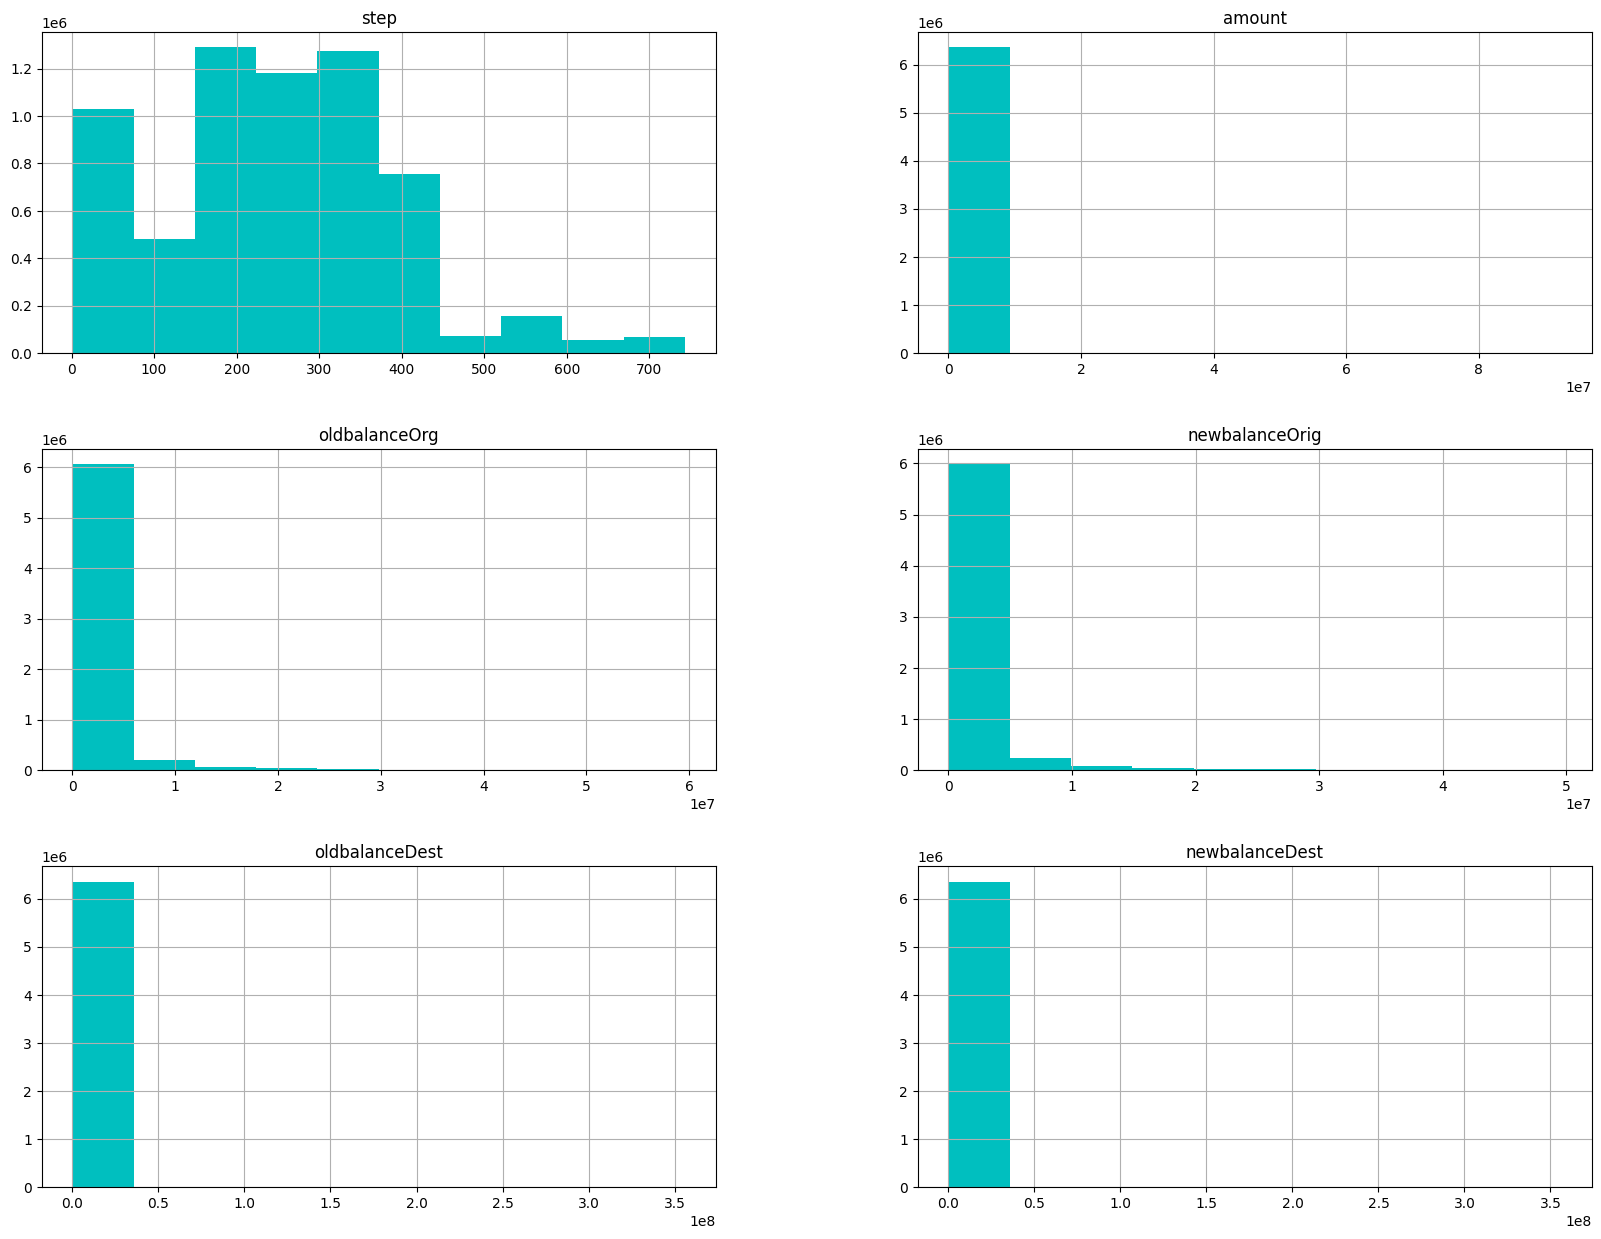

In [49]:
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

(df[numerical_features]+0.001).hist(figsize=(20, 15), color = 'c');

Log Transformation:

we have to avoid log transformation because our outliers are important and useful for clustering:

Log transformation will compress the data range, reducing the relative impact of outliers, which might obscure their significance in cluster formation.
Since i want to retain the distinctiveness of outliers, log transformation is not suitable for this case.

StandardScaler:
StandardScaler will standardize the features, ensuring that all features contribute equally to the clustering process, but it will not distort the relationship between normal data points and outliers.
It preserves the relative distances between data points, meaning our outliers will still remain distinct and can influence cluster formation.

In [12]:
df_scaled = df.copy()

In [13]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

scaler = StandardScaler()

df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])


In [27]:
df_scaled.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.703047,-0.281573,-0.229807,-0.237619,-0.323814,-0.333412,0,0,0,0,1,0
1,-1.703047,-0.294782,-0.281357,-0.285810,-0.323814,-0.333412,0,0,0,0,1,0
2,-1.703047,-0.297570,-0.288651,-0.292439,-0.323814,-0.333412,1,0,0,0,0,1
3,-1.703047,-0.297570,-0.288651,-0.292439,-0.317583,-0.333412,1,0,1,0,0,0
4,-1.703047,-0.278545,-0.274327,-0.282219,-0.323814,-0.333412,0,0,0,0,1,0


In [53]:
df_scaled.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06
mean,-5.717751e-18,-8.959895e-17,-2.244932e-16,9.791649e-17,-1.786619e-16,3.302359e-16,1.288309e-03,2.199232e-01,3.516642e-01,6.511799e-03,3.381469e-01,8.375392e-02
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.586990e-02,4.141944e-01,4.774898e-01,8.043256e-02,4.730789e-01,2.770184e-01
min,-1.703047e+00,-2.978695e-01,-2.887141e-01,-2.924394e-01,-3.238143e-01,-3.334119e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-6.140366e-01,-2.756936e-01,-2.887141e-01,-2.924394e-01,-3.238143e-01,-3.334119e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-3.088928e-02,-1.738670e-01,-2.837948e-01,-2.924394e-01,-2.847732e-01,-2.749860e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.435944e-01,4.781532e-02,-2.515582e-01,-2.431046e-01,-4.638253e-02,-3.077879e-02,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,3.510150e+00,1.528113e+02,2.034176e+01,1.666544e+01,1.044119e+02,9.660900e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


3.   Visualisation et Comprendre les relations entre les caractéristique


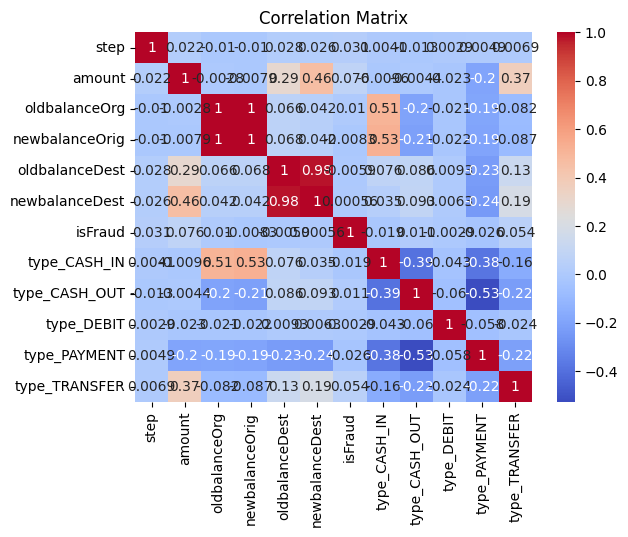

In [54]:
corr_matrix = df_scaled.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

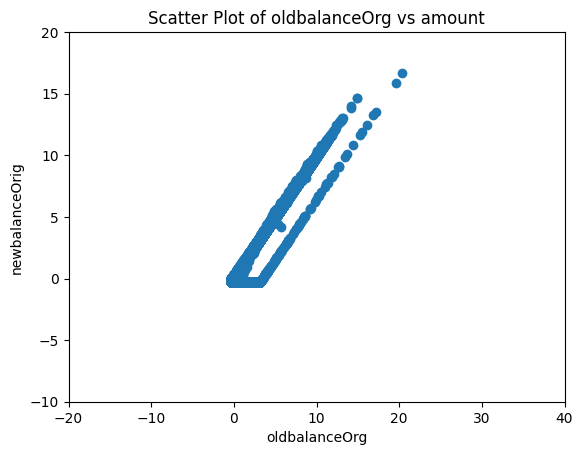

In [55]:
plt.scatter(df_scaled['oldbalanceOrg'], df_scaled['newbalanceOrig'])
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('Scatter Plot of oldbalanceOrg vs amount')
plt.xlim(-20, 40)
plt.ylim(-10, 20)
plt.show()

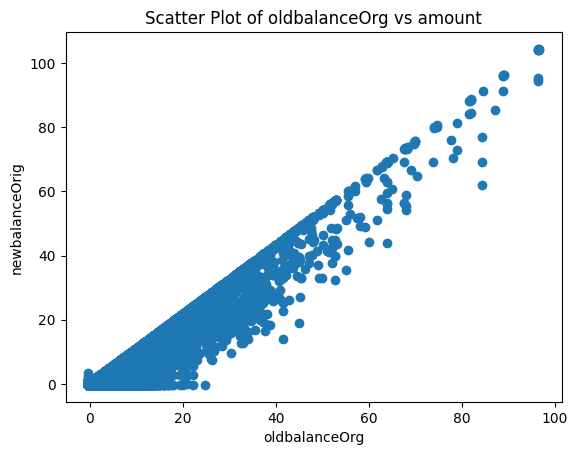

In [56]:
plt.scatter(df_scaled['newbalanceDest'], df_scaled['oldbalanceDest'])
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('Scatter Plot of oldbalanceOrg vs amount')
# plt.xlim(-10, 70)
# plt.ylim(-10, 70)
plt.show()

We notice that both


*   newbalanceDes & newbalanceDest
*  oldbalanceOrg & newbalanceOrig

are highly corrolated so we can choose one of each and drop the other

( i'm going to choose for example oldbalanceOrg and oldbalanceDes)


In [14]:
df_scaled.drop(['newbalanceOrig', 'newbalanceDest'],axis=1,inplace=True)

In [15]:
df_scaled.head(2)

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.703047,-0.281573,-0.229807,-0.323814,0,0,0,0,1,0
1,-1.703047,-0.294782,-0.281357,-0.323814,0,0,0,0,1,0


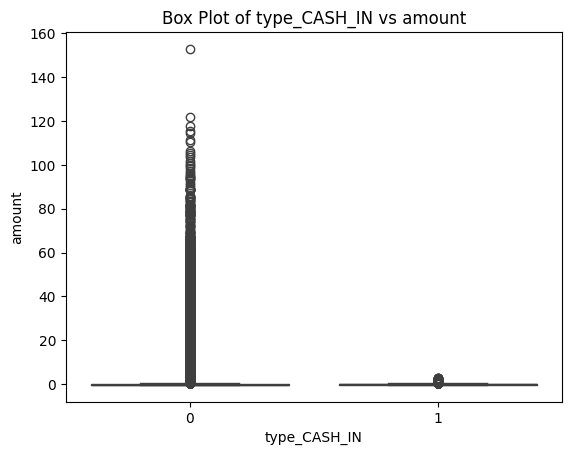

In [62]:
sns.boxplot(x='type_CASH_IN', y='amount', data=df_scaled)
plt.title('Box Plot of type_CASH_IN vs amount')
plt.show()

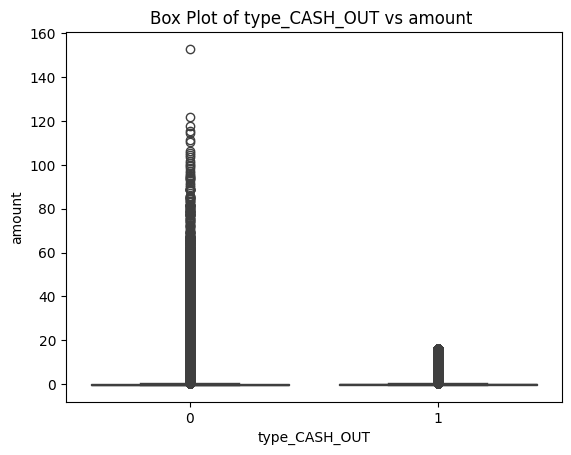

In [63]:
sns.boxplot(x='type_CASH_OUT', y='amount', data=df_scaled)
plt.title('Box Plot of type_CASH_OUT vs amount ')
plt.show()

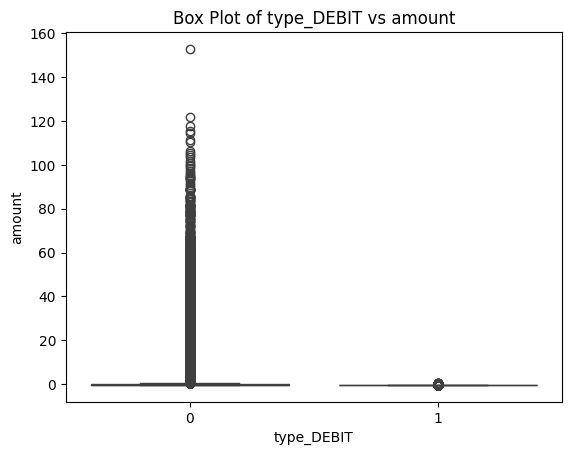

In [64]:
sns.boxplot(x='type_DEBIT', y='amount', data=df_scaled)
plt.title('Box Plot of type_DEBIT vs amount')
plt.show()

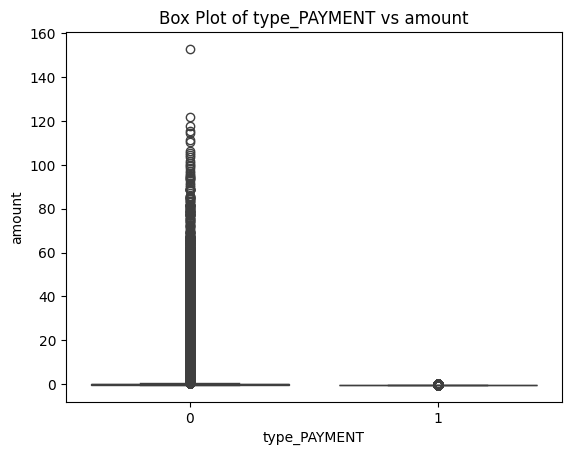

In [65]:
sns.boxplot(x='type_PAYMENT', y='amount', data=df_scaled)
plt.title('Box Plot of type_PAYMENT vs amount')
plt.show()

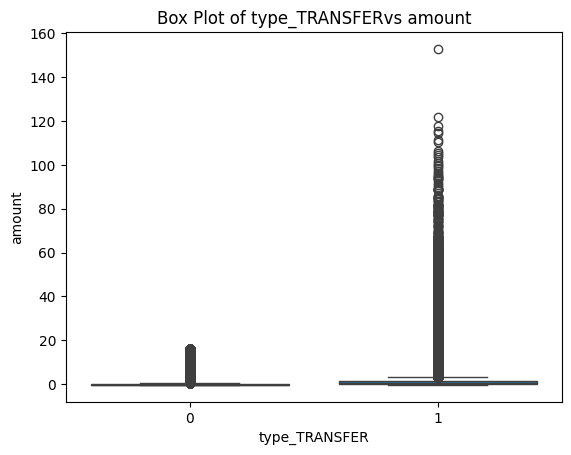

In [66]:
sns.boxplot(x='type_TRANSFER', y='amount', data=df_scaled)
plt.title('Box Plot of type_TRANSFERvs amount')
plt.show()

In [ ]:
# df.to_csv('onlinefraud_final.csv', index=False)

In [16]:
X = df_scaled.drop('isFraud',axis = 1)
X

,step,amount,oldbalanceOrg,oldbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.703047,-0.281573,-0.229807,-0.323814,0,0,0,1,0
1,-1.703047,-0.294782,-0.281357,-0.323814,0,0,0,1,0
2,-1.703047,-0.297570,-0.288651,-0.323814,0,0,0,0,1
3,-1.703047,-0.297570,-0.288651,-0.317583,0,1,0,0,0
4,-1.703047,-0.278545,-0.274327,-0.323814,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
6362615,3.510150,0.264715,-0.171104,-0.323814,0,1,0,0,0
6362616,3.510150,10.155146,1.896522,-0.323814,0,0,0,0,1
6362617,3.510150,10.155146,1.896522,-0.303666,0,1,0,0,0
6362618,3.510150,1.109913,0.005587,-0.323814,0,0,0,0,1


In [70]:
Xnum=X.values
Xnum

array([[-1.70304667e+00, -2.81572972e-01, -2.29806936e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.70304667e+00, -2.94781838e-01, -2.81356947e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.70304667e+00, -2.97569702e-01, -2.88651443e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 3.51014987e+00,  1.01551459e+01,  1.89652180e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.51014987e+00,  1.10991269e+00,  5.58719984e-03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 3.51014987e+00,  1.10991269e+00,  5.58719984e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [71]:
Xnum.shape

(6362604, 9)

In [72]:
matrice_cov=np.cov(Xnum.T)
matrice_cov.shape

(9, 9)

In [73]:
from numpy.linalg import eig
(valeurs_propres,vecteurs_propres)=eig(matrice_cov)
valeurs_propres.shape

(9,)

In [74]:
pourcentage_information=(valeurs_propres / valeurs_propres.sum())*100
pourcentage_information

array([ 2.84187070e+01,  2.11216923e+01,  2.27896806e+01,  1.49880207e+01,
        6.96321359e+00,  3.74268428e+00,  1.80519325e+00,  1.70808340e-01,
       -1.91036545e-15])

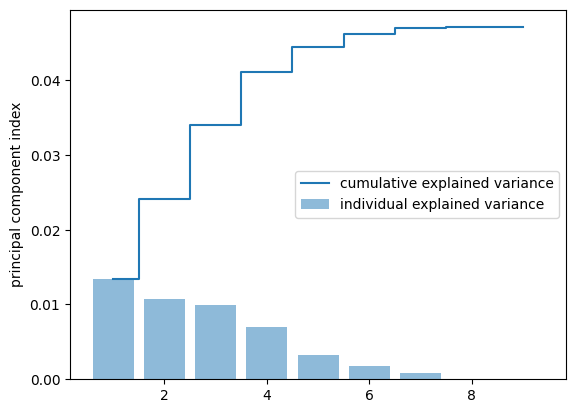

In [75]:
tot=sum([ 2.84187070e+01,  2.11216923e+01,  2.27896806e+01,  1.49880207e+01,
        6.96321359e+00,  3.74268428e+00,  1.80519325e+00,  1.70808340e-01,
       -1.91036545e-15])

var_exp=[(i/tot) for i in sorted(valeurs_propres,reverse=True) ]
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,10), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('explained variance ratio')
plt.ylabel('principal component index')
plt.legend(loc='best')
plt.show()

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

Projecting 9-dimensional data to 2D


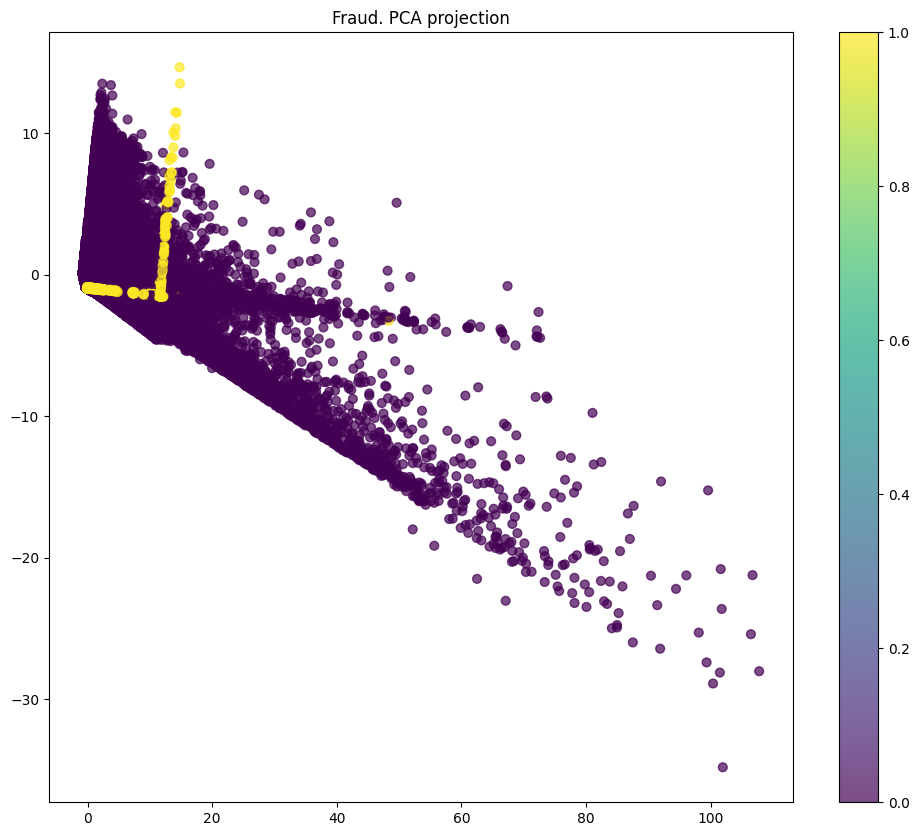

In [84]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df_scaled['isFraud'], alpha=0.7, s=40);
plt.colorbar()
plt.title('Fraud. PCA projection');

In [26]:
pca3 = PCA(n_components=3)
X_pca_scaled3 = pca3.fit_transform(X)

print('Projecting %d-dimensional data to 3D' % X.shape[1])

Projecting 9-dimensional data to 3D


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

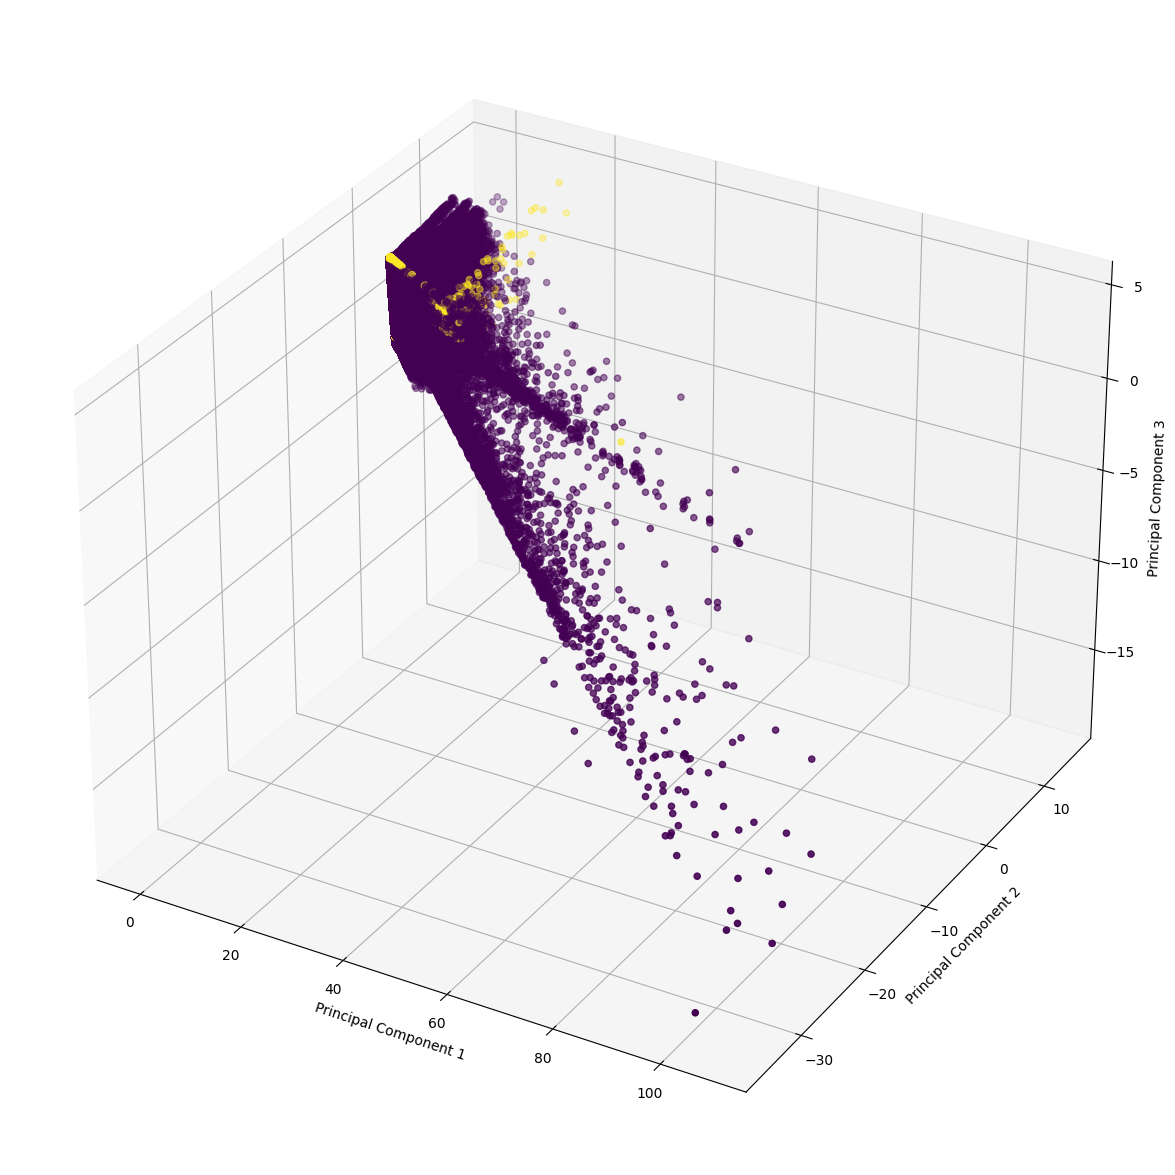

In [27]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_scaled3[:, 0], X_pca_scaled3[:, 1], X_pca_scaled3[:, 2],c=df_scaled['isFraud'])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar()

plt.title('3D Visualization of PCA-transformed Data')
plt.show()

t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

With t-SNE, the picture looks better since PCA has a linear constraint while t-SNE does not. However, even with such a small dataset, the t-SNE algorithm takes significantly more time to complete than PCA.

In [ ]:
# Invoke the TSNE method
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=2000,random_state = 17)

df_tsne_scaled = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=df_scaled['isFraud'],
            alpha=0.7, s=40)
plt.colorbar()
plt.title('Fraud. t-SNE projection');

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6362604 samples in 42.713s...


due to the large amount of samples we need te reduces its number in order to visualize (minimize the memoire usage )

In [17]:
# Get all fraud cases (where isFraud == 1)
fraud_cases = df_scaled[df_scaled['isFraud'] == 1]

# Get non-fraud cases (where isFraud == 0) with the same size as fraud cases
non_fraud_cases = df_scaled[df_scaled['isFraud'] == 0].sample(n=len(fraud_cases), random_state=42)

# Combine the two subsets to form a balanced dataset
balanced_df = pd.concat([fraud_cases, non_fraud_cases])

# Shuffle the data to avoid any order bias
balanced_df = balanced_df.sample(frac=1, random_state=17).reset_index(drop=True)
balanced_df.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.445416,-0.100287,-0.264684,0.504468,0,0,1,0,0,0
1,-1.660891,0.433257,-0.135870,-0.323814,1,0,0,0,0,1
2,-0.740502,0.204678,-0.183655,-0.323814,1,0,1,0,0,0
3,0.130706,-0.249575,-0.288714,3.993899,0,0,1,0,0,0
4,0.987862,0.229451,-0.288714,0.597735,0,0,0,0,0,1


In [18]:
balanced_df.shape

(16394, 10)

In [19]:
x_balanced=balanced_df.drop('isFraud',axis=1)
y_balanced=balanced_df['isFraud']

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 16394 samples in 0.044s...
[t-SNE] Computed neighbors for 16394 samples in 2.751s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16394
[t-SNE] Computed conditional probabilities for sample 2000 / 16394
[t-SNE] Computed conditional probabilities for sample 3000 / 16394
[t-SNE] Computed conditional probabilities for sample 4000 / 16394
[t-SNE] Computed conditional probabilities for sample 5000 / 16394
[t-SNE] Computed conditional probabilities for sample 6000 / 16394
[t-SNE] Computed conditional probabilities for sample 7000 / 16394
[t-SNE] Computed conditional probabilities for sample 8000 / 16394
[t-SNE] Computed conditional probabilities for sample 9000 / 16394
[t-SNE] Computed conditional probabilities for sample 10000 / 16394
[t-SNE] Computed conditional probabilities for sample 11000 / 16394
[t-SNE] Computed conditional probabilities for sample 12000 / 16394
[t-SNE] Computed conditional probabilities for sa

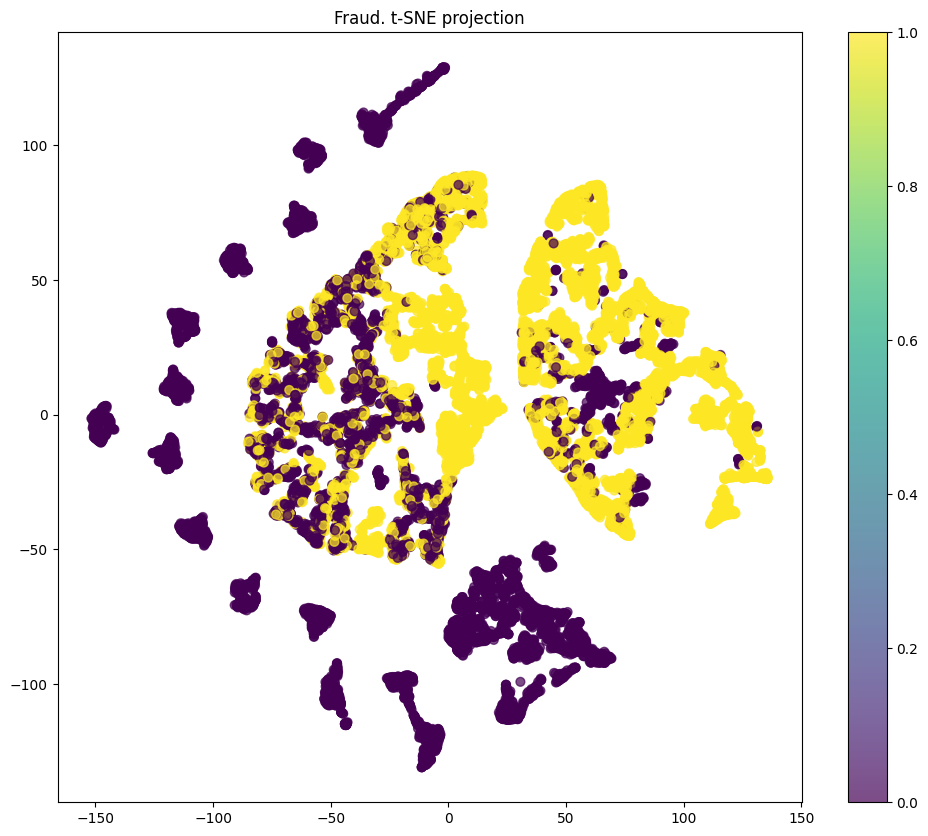

In [21]:
# Invoke the TSNE method
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=2000,random_state = 17)

df_tsne_scaled = tsne.fit_transform(x_balanced)

plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=y_balanced,
            alpha=0.7, s=40)
plt.colorbar()
plt.title('Fraud. t-SNE projection');

In [28]:
# df_scaled.to_csv('onlinefraud_Sclaed.csv', index=False)